In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("uber_reviews_without_reviewid.csv")
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [3]:
df.isnull().sum()

userName                    0
userImage               12000
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     1740
at                          0
replyContent            11967
repliedAt               11967
appVersion               1740
dtype: int64

In [4]:
df.dtypes

userName                 object
userImage               float64
content                  object
score                     int64
thumbsUpCount             int64
reviewCreatedVersion     object
at                       object
replyContent             object
repliedAt                object
appVersion               object
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 937.6+ KB


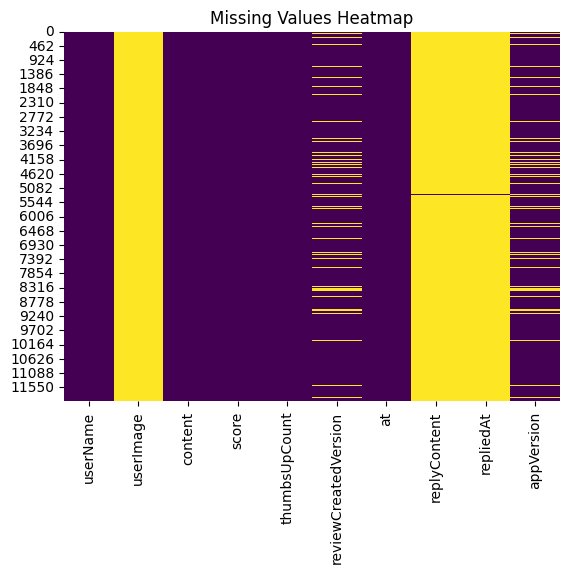

In [7]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
# Display summary statistics for numerical columns
print(df.describe())

# Display summary statistics for object (categorical) columns
print(df.describe(include=['object']))


       userImage         score  thumbsUpCount
count        0.0  12000.000000   12000.000000
mean         NaN      3.925417       0.517000
std          NaN      1.658940       6.298268
min          NaN      1.000000       0.000000
25%          NaN      3.000000       0.000000
50%          NaN      5.000000       0.000000
75%          NaN      5.000000       0.000000
max          NaN      5.000000     239.000000
       userName content reviewCreatedVersion                   at  \
count     12000   12000                10260                12000   
unique    12000    8172                  142                11949   
top      User_0    Good          4.554.10001  2024-12-13 15:58:40   
freq          1     985                 3187                    3   

                                             replyContent  \
count                                                  33   
unique                                                 33   
top     Hi Robin, the feedback from our riders is vita...

In [9]:
# Drop columns with a high percentage of missing values (e.g., replyContent and repliedAt)
df.drop(['replyContent', 'repliedAt'], axis=1, inplace=True)

# Fill missing values in 'userImage' with 0 (assuming NaN indicates no image)
df['userImage'].fillna(0, inplace=True)

# Fill missing values in 'reviewCreatedVersion' and 'appVersion' with a placeholder
df['reviewCreatedVersion'].fillna('Unknown', inplace=True)
df['appVersion'].fillna('Unknown', inplace=True)


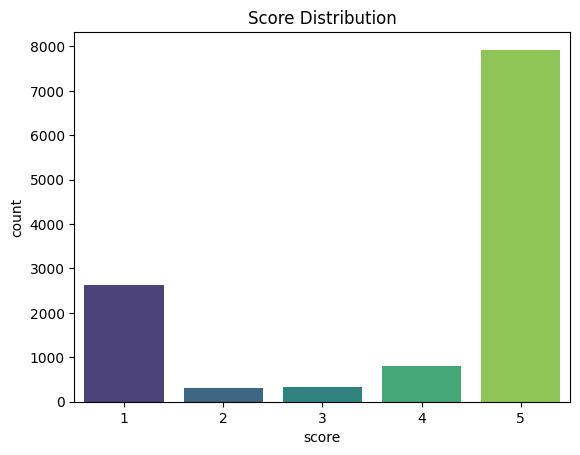

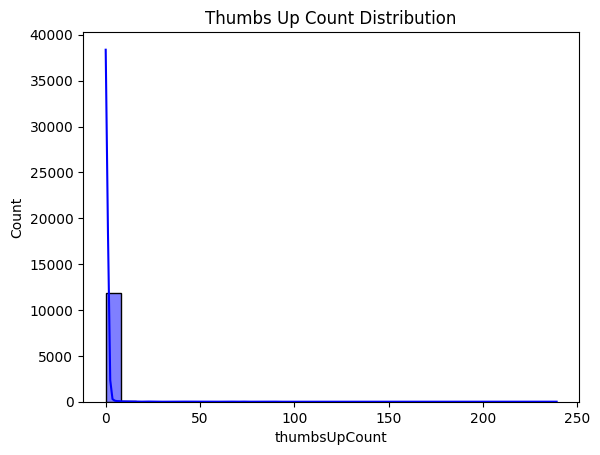

In [10]:
# Distribution of the score
sns.countplot(data=df, x='score', palette='viridis')
plt.title("Score Distribution")
plt.show()

# Distribution of thumbsUpCount
sns.histplot(df['thumbsUpCount'], kde=True, bins=30, color='blue')
plt.title("Thumbs Up Count Distribution")
plt.show()


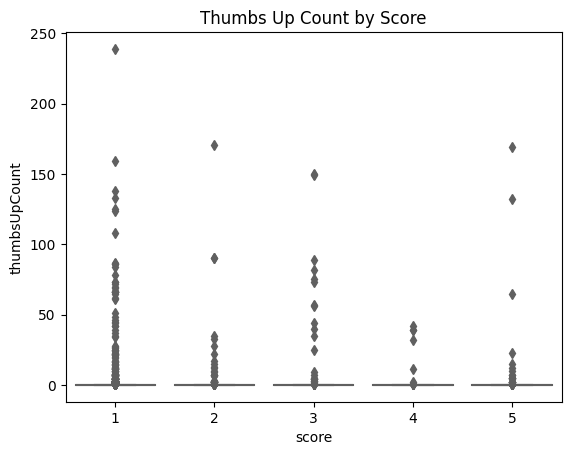

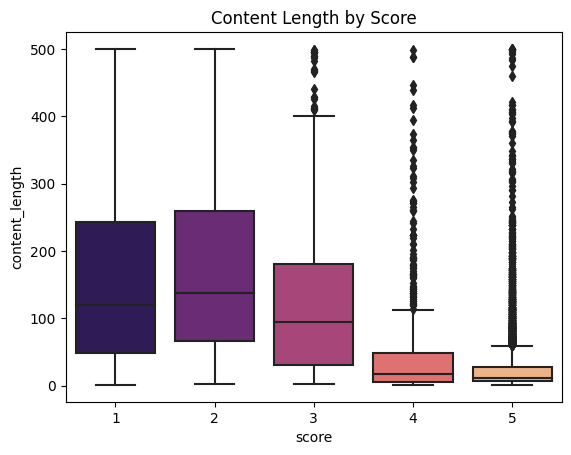

In [11]:
# Relationship between score and thumbsUpCount
sns.boxplot(data=df, x='score', y='thumbsUpCount', palette='coolwarm')
plt.title("Thumbs Up Count by Score")
plt.show()

# Analyze content length by score
df['content_length'] = df['content'].apply(len)
sns.boxplot(data=df, x='score', y='content_length', palette='magma')
plt.title("Content Length by Score")
plt.show()


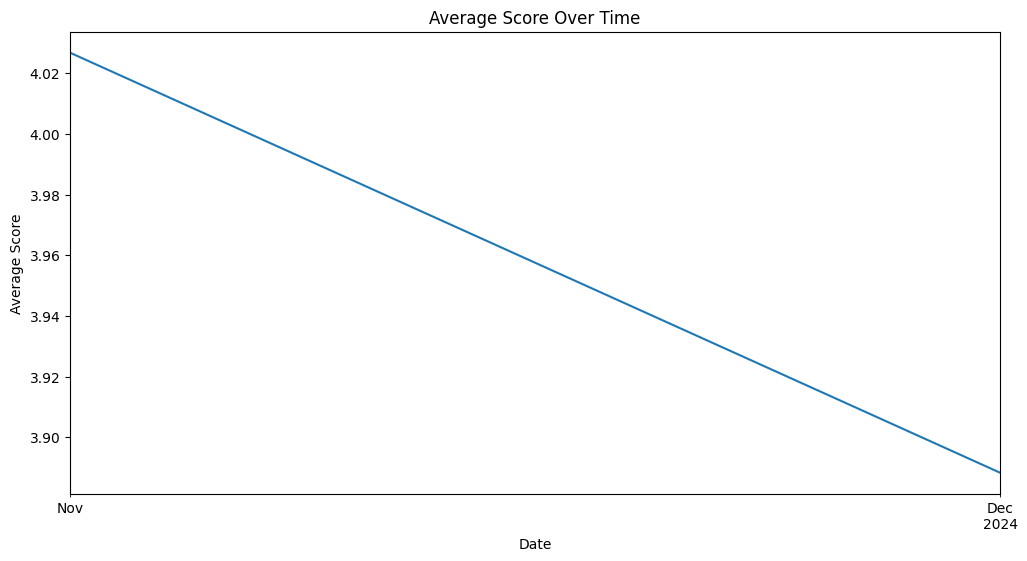

In [12]:
# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'])

# Reviews over time
df.set_index('at')['score'].resample('M').mean().plot(kind='line', figsize=(12, 6))
plt.title("Average Score Over Time")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.show()


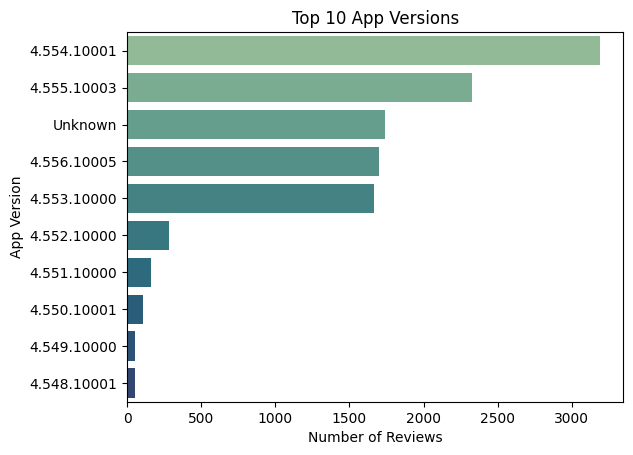

In [13]:
# Most common app versions
top_versions = df['appVersion'].value_counts().head(10)
sns.barplot(x=top_versions.values, y=top_versions.index, palette='crest')
plt.title("Top 10 App Versions")
plt.xlabel("Number of Reviews")
plt.ylabel("App Version")
plt.show()


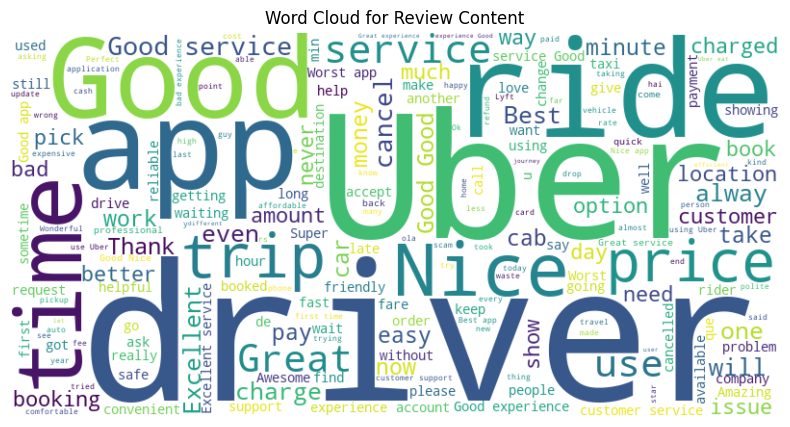

In [14]:
from wordcloud import WordCloud

# Generate word cloud for content
text = " ".join(review for review in df['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Review Content")
plt.show()


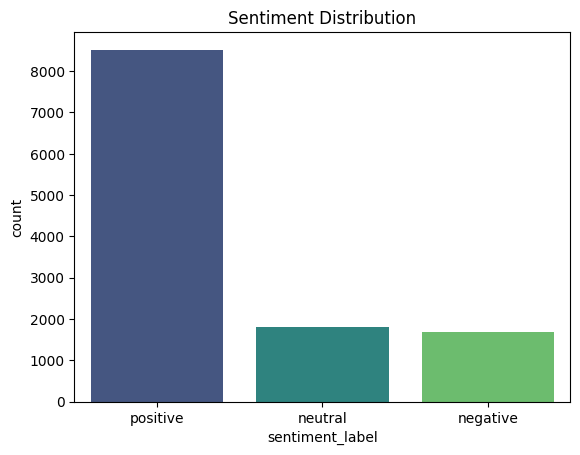

In [15]:
from textblob import TextBlob

# Create a sentiment score
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Sentiment distribution
sns.countplot(data=df, x='sentiment_label', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


Correlation between thumbsUpCount and score: -0.10494681978498792


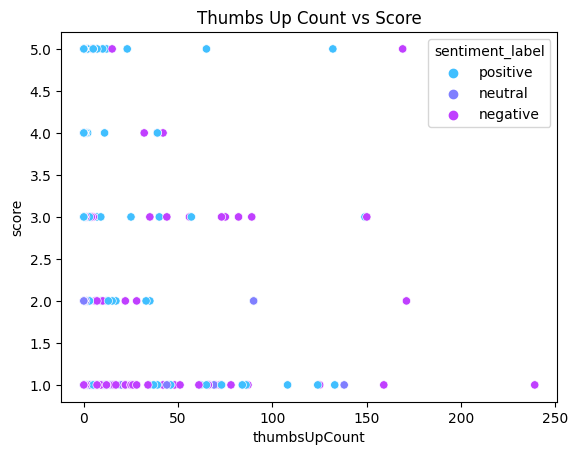

In [16]:
# Correlation between thumbsUpCount and score
corr = df['thumbsUpCount'].corr(df['score'])
print(f"Correlation between thumbsUpCount and score: {corr}")

# Visualize thumbsUpCount vs score
sns.scatterplot(data=df, x='thumbsUpCount', y='score', hue='sentiment_label', palette='cool')
plt.title("Thumbs Up Count vs Score")
plt.show()


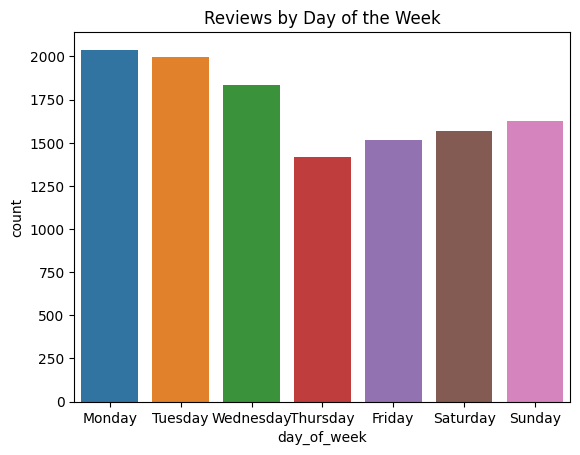

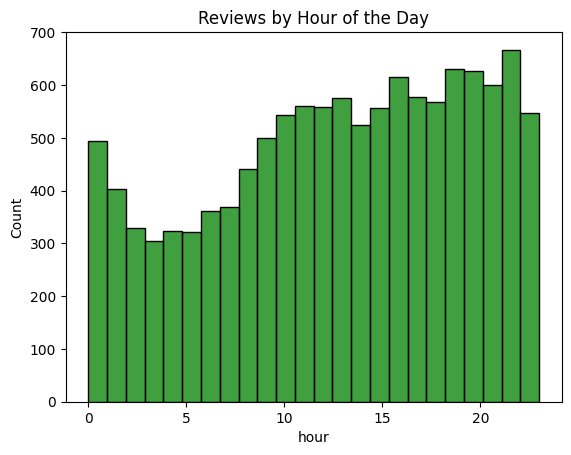

In [17]:
# Reviews by day of the week
df['day_of_week'] = df['at'].dt.day_name()
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Reviews by Day of the Week")
plt.show()

# Hourly review analysis
df['hour'] = df['at'].dt.hour
sns.histplot(df['hour'], bins=24, kde=False, color='green')
plt.title("Reviews by Hour of the Day")
plt.show()


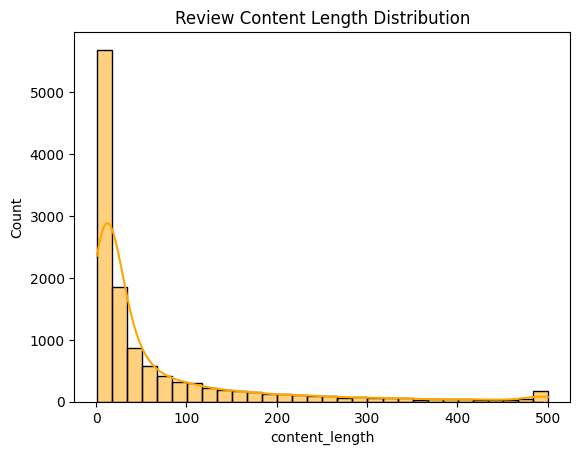

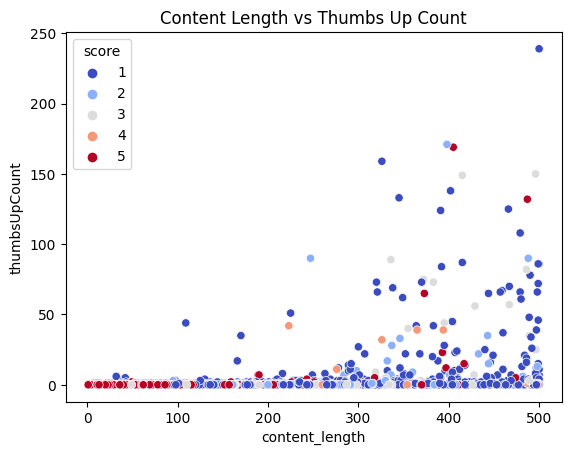

In [18]:
# Distribution of review content length
sns.histplot(df['content_length'], bins=30, kde=True, color='orange')
plt.title("Review Content Length Distribution")
plt.show()

# Relationship between content length and thumbsUpCount
sns.scatterplot(data=df, x='content_length', y='thumbsUpCount', hue='score', palette='coolwarm')
plt.title("Content Length vs Thumbs Up Count")
plt.show()


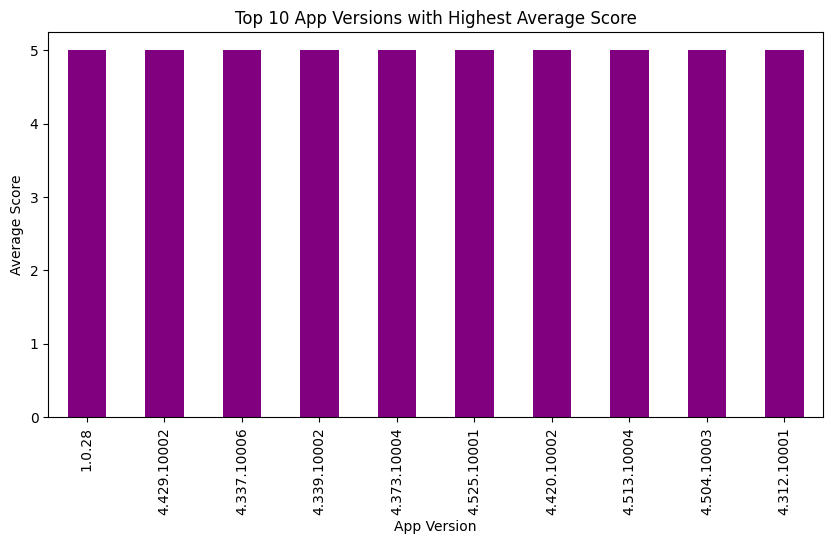

In [19]:
# Average score by app version
avg_score_by_version = df.groupby('appVersion')['score'].mean().sort_values(ascending=False).head(10)
avg_score_by_version.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Top 10 App Versions with Highest Average Score")
plt.xlabel("App Version")
plt.ylabel("Average Score")
plt.show()


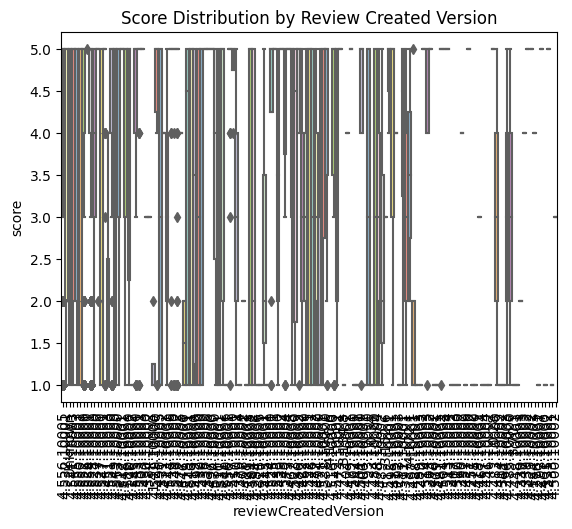

In [20]:
# Score distribution across reviewCreatedVersion
sns.boxplot(data=df, x='reviewCreatedVersion', y='score', palette='Set3')
plt.xticks(rotation=90)
plt.title("Score Distribution by Review Created Version")
plt.show()


In [21]:
from collections import Counter

# Function to get word frequencies
def get_word_frequencies(reviews):
    words = " ".join(reviews).split()
    return Counter(words).most_common(20)

# Get word frequencies for each sentiment
positive_reviews = df[df['sentiment_label'] == 'positive']['content']
negative_reviews = df[df['sentiment_label'] == 'negative']['content']

print("Top words in positive reviews:", get_word_frequencies(positive_reviews))
print("Top words in negative reviews:", get_word_frequencies(negative_reviews))


Top words in positive reviews: [('and', 2200), ('Good', 1935), ('the', 1851), ('to', 1642), ('I', 1262), ('a', 1163), ('good', 1076), ('Very', 947), ('is', 885), ('for', 861), ('service', 832), ('app', 712), ('was', 686), ('Nice', 673), ('Uber', 629), ('driver', 611), ('very', 610), ('ride', 609), ('in', 551), ('it', 522)]
Top words in negative reviews: [('the', 1816), ('to', 1711), ('and', 1300), ('I', 1204), ('a', 954), ('is', 769), ('for', 706), ('app', 530), ('of', 493), ('my', 479), ('it', 464), ('not', 457), ('Uber', 449), ('in', 443), ('driver', 410), ('you', 404), ('they', 379), ('was', 371), ('ride', 371), ('this', 361)]


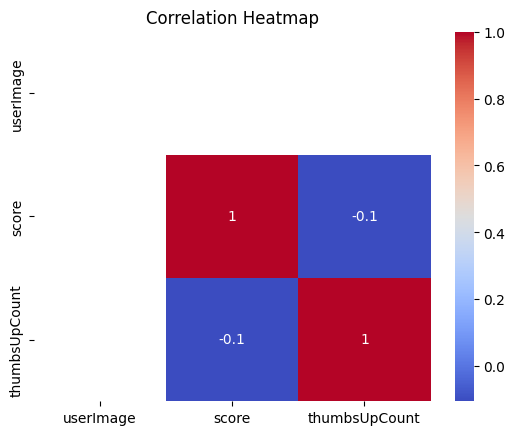

In [22]:
# Correlation heatmap
numerical_columns = ['userImage', 'score', 'thumbsUpCount']
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


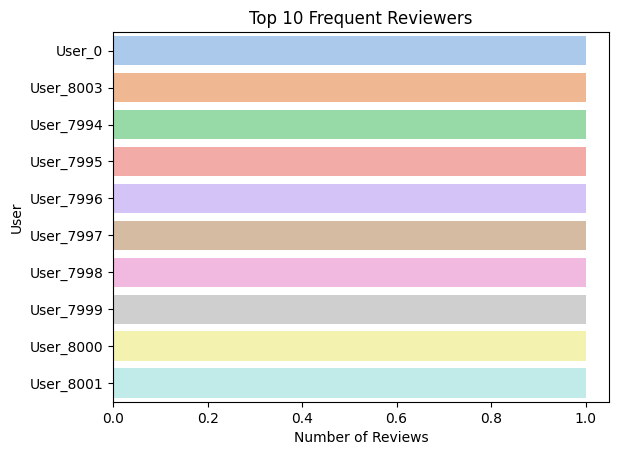

In [23]:
# Most frequent reviewers
top_reviewers = df['userName'].value_counts().head(10)
sns.barplot(y=top_reviewers.index, x=top_reviewers.values, palette='pastel')
plt.title("Top 10 Frequent Reviewers")
plt.xlabel("Number of Reviews")
plt.ylabel("User")
plt.show()


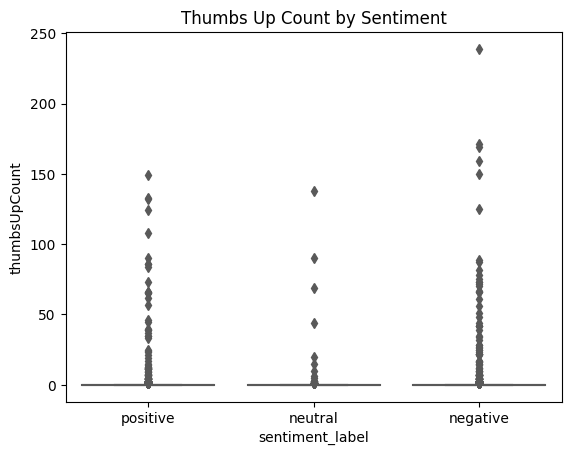

In [24]:
sns.boxplot(data=df, x='sentiment_label', y='thumbsUpCount', palette='Set2')
plt.title("Thumbs Up Count by Sentiment")
plt.show()


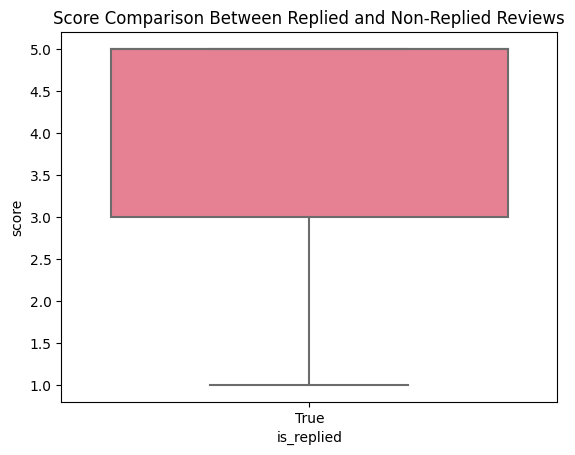

In [25]:
# Add a column indicating whether a review was replied to
df['is_replied'] = ~df['reviewCreatedVersion'].isnull()

# Score comparison between replied and non-replied reviews
sns.boxplot(data=df, x='is_replied', y='score', palette='husl')
plt.title("Score Comparison Between Replied and Non-Replied Reviews")
plt.show()


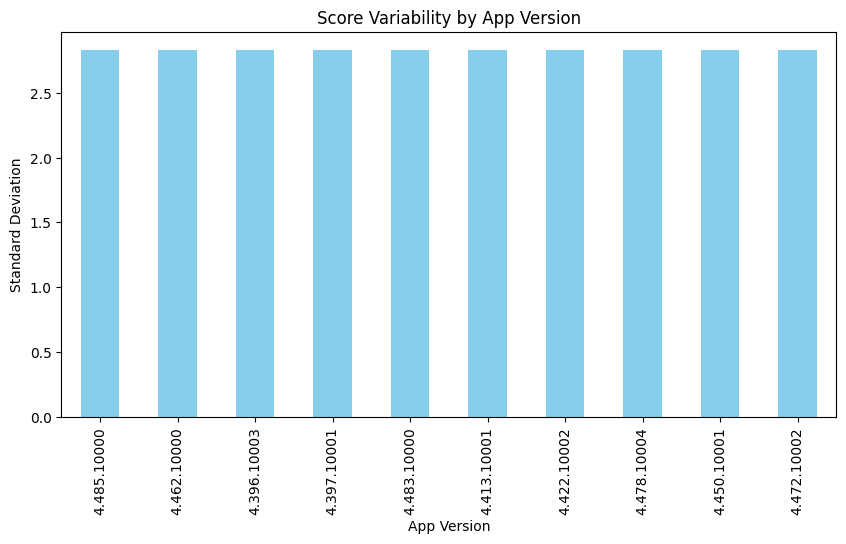

In [26]:
# Variability in scores by app version
score_variability = df.groupby('appVersion')['score'].std().sort_values(ascending=False).head(10)
score_variability.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Score Variability by App Version")
plt.xlabel("App Version")
plt.ylabel("Standard Deviation")
plt.show()


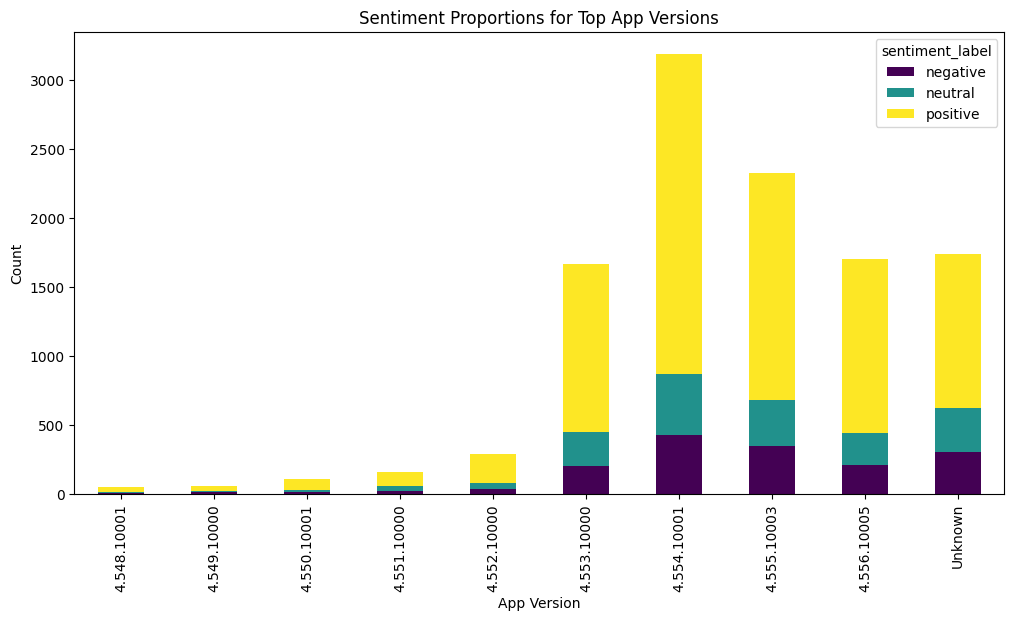

In [27]:
# Proportion of sentiments for top app versions
top_versions_sentiments = df[df['appVersion'].isin(top_versions.index)].groupby(['appVersion', 'sentiment_label']).size().unstack()
top_versions_sentiments.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Sentiment Proportions for Top App Versions")
plt.xlabel("App Version")
plt.ylabel("Count")
plt.show()


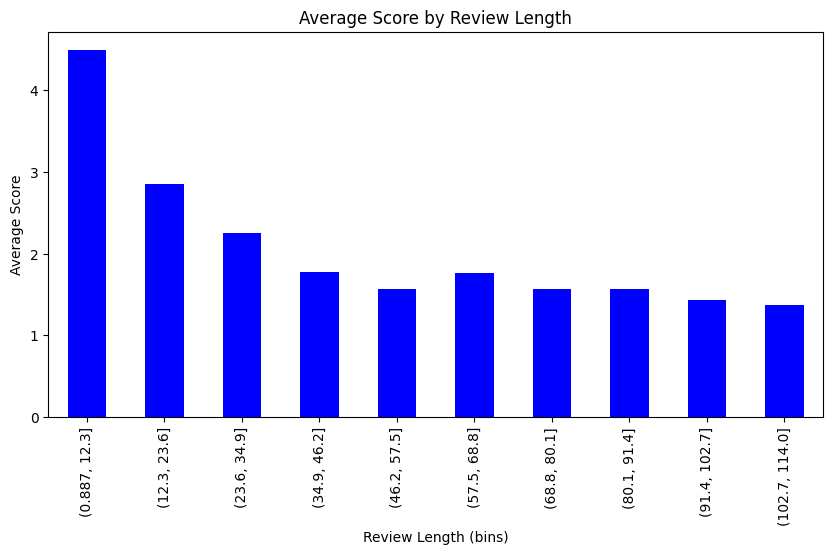

In [28]:
# Calculate review length
df['content_length'] = df['content'].apply(lambda x: len(x.split()))

# Average score by review length
avg_score_by_length = df.groupby(pd.cut(df['content_length'], bins=10))['score'].mean()
avg_score_by_length.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title("Average Score by Review Length")
plt.xlabel("Review Length (bins)")
plt.ylabel("Average Score")
plt.show()


In [29]:
# Top reviews with most thumbs up
top_reviews = df.sort_values(by='thumbsUpCount', ascending=False).head(10)
print("Top Reviews with Most Thumbs Up:")
print(top_reviews[['userName', 'content', 'thumbsUpCount']])


Top Reviews with Most Thumbs Up:
         userName                                            content  \
7686    User_7686  Worst app and membership program ever. Custome...   
6074    User_6074  It is very difficult to make contact regarding...   
3240    User_3240  I will now be using Bolt instead of Uber. On 2...   
7796    User_7796  The app used to be pretty good, but now it has...   
11485  User_11485  Difficult to change my home and work addresses...   
8620    User_8620  Uber services are getting frustrating day-by-d...   
4223    User_4223  Worst app to book a cab. There was a glitch in...   
1717    User_1717  Uber Moto drivers are really bad. Y'all should...   
5916    User_5916  The Uber app is incredibly convenient and reli...   
6164    User_6164  Horrible experience. Got stranded. I kept gett...   

       thumbsUpCount  
7686             239  
6074             171  
3240             169  
7796             159  
11485            150  
8620             149  
4223         

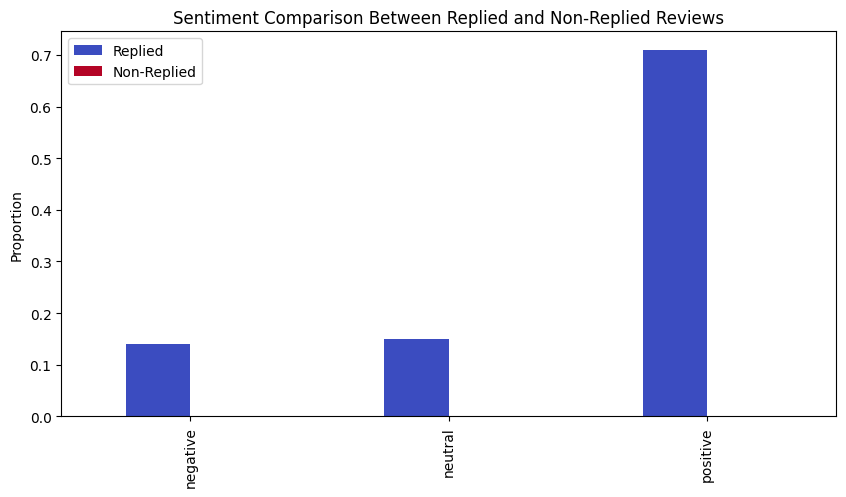

In [30]:
# Compare sentiment proportions for replied and non-replied reviews
replied_sentiment = df[df['is_replied']]['sentiment_label'].value_counts(normalize=True)
non_replied_sentiment = df[~df['is_replied']]['sentiment_label'].value_counts(normalize=True)

# Plot comparison
pd.DataFrame({'Replied': replied_sentiment, 'Non-Replied': non_replied_sentiment}).plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
plt.title("Sentiment Comparison Between Replied and Non-Replied Reviews")
plt.ylabel("Proportion")
plt.show()


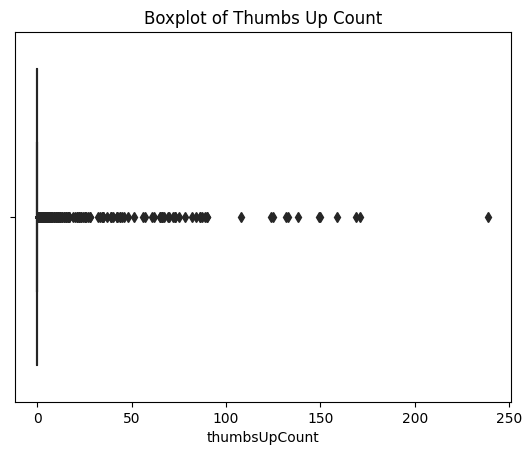

Number of outliers in thumbsUpCount: 552


In [32]:
# Boxplot for thumbsUpCount
sns.boxplot(data=df, x='thumbsUpCount', color='teal')
plt.title("Boxplot of Thumbs Up Count")
plt.show()

# Detect outliers using IQR
Q1 = df['thumbsUpCount'].quantile(0.25)
Q3 = df['thumbsUpCount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['thumbsUpCount'] < Q1 - 1.5 * IQR) | (df['thumbsUpCount'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in thumbsUpCount: {len(outliers)}")



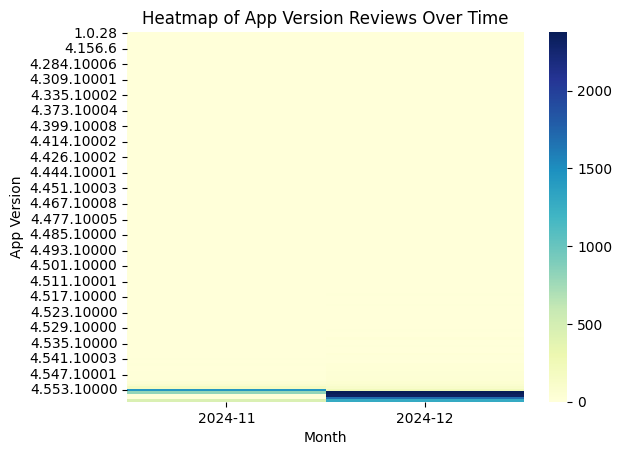

In [34]:
# Count of reviews by appVersion over time
df['review_month'] = df['at'].dt.to_period('M')
version_trend = df.groupby(['review_month', 'appVersion']).size().unstack().fillna(0)

# Heatmap of app versions over time
sns.heatmap(version_trend.T, cmap='YlGnBu', cbar=True)
plt.title("Heatmap of App Version Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("App Version")
plt.show()



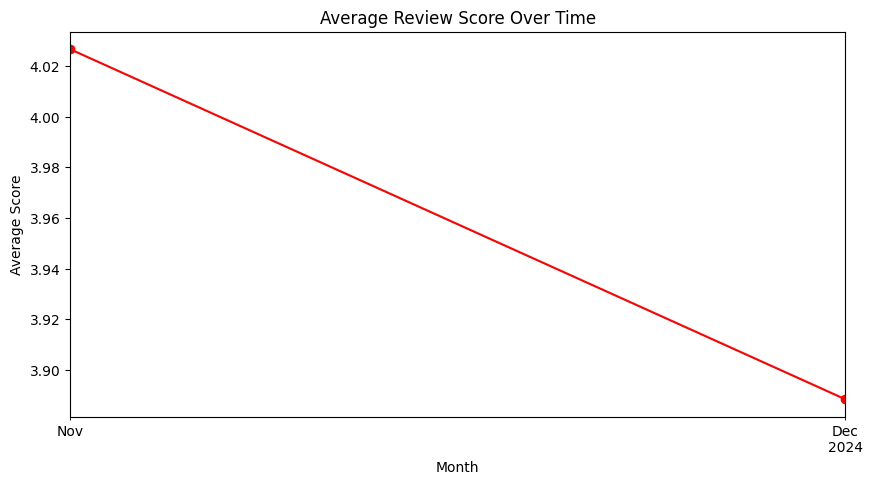

In [35]:
# Average score by month
avg_score_by_month = df.groupby('review_month')['score'].mean()
avg_score_by_month.plot(kind='line', figsize=(10, 5), marker='o', color='red')
plt.title("Average Review Score Over Time")
plt.xlabel("Month")
plt.ylabel("Average Score")
plt.show()


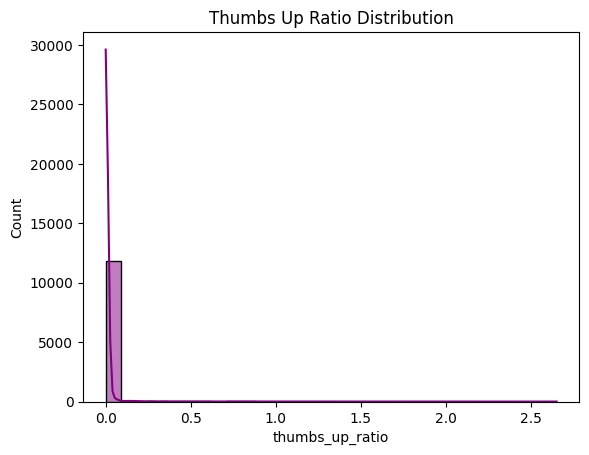

In [36]:
# Thumbs-up to review length ratio
df['thumbs_up_ratio'] = df['thumbsUpCount'] / df['content_length']

# Time gap between reviews
df['time_gap'] = df['at'].diff().dt.days

# Analyze new feature
sns.histplot(df['thumbs_up_ratio'], bins=30, kde=True, color='purple')
plt.title("Thumbs Up Ratio Distribution")
plt.show()


Final Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              12000 non-null  object        
 1   userImage             12000 non-null  float64       
 2   content               12000 non-null  object        
 3   score                 12000 non-null  int64         
 4   thumbsUpCount         12000 non-null  int64         
 5   reviewCreatedVersion  12000 non-null  object        
 6   at                    12000 non-null  datetime64[ns]
 7   appVersion            12000 non-null  object        
 8   content_length        12000 non-null  int64         
 9   sentiment             12000 non-null  float64       
 10  sentiment_label       12000 non-null  object        
 11  day_of_week           12000 non-null  object        
 12  hour                  12000 non-null  int64       

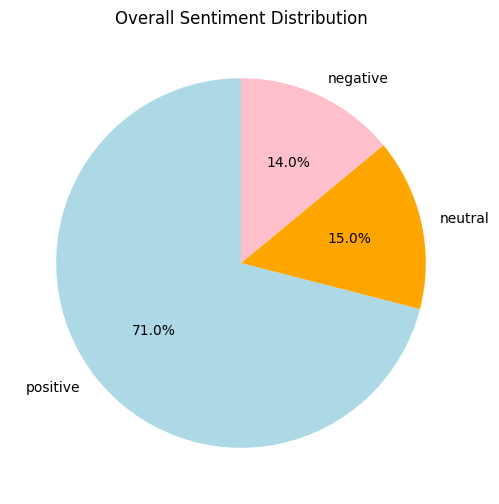

In [37]:
# Import necessary libraries
import pandas as pd

# Summary of the dataset after cleaning and feature engineering
print("Final Dataset Overview:")
print(df.info())

print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# Display null value summary
print("\nRemaining Null Values in Dataset:")
print(df.isnull().sum())

# Save the cleaned dataset for further use
output_file = "uber_reviews_cleaned.csv"
df.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved as '{output_file}'.")

# Display top insights as a final summary
print("\nKey Insights from EDA:")
print("1. Average review score:", df['score'].mean())
print("2. Most frequent app version:", df['appVersion'].mode()[0])
print("3. Highest thumbs-up count review:")
print(df.loc[df['thumbsUpCount'].idxmax(), ['userName', 'content', 'thumbsUpCount']])
print("4. Average review length:", df['content_length'].mean())
print("5. Sentiment distribution:")
print(df['sentiment_label'].value_counts(normalize=True) * 100)

# End with a visualization of overall sentiment
import matplotlib.pyplot as plt

# Pie chart of sentiment distribution
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'pink'], figsize=(6, 6))
plt.title("Overall Sentiment Distribution")
plt.ylabel("")  # Hide the y-axis label
plt.show()


In [39]:
# Save the cleaned dataset
cleaned_filename = 'cleaned_uber_reviews.csv'
df.to_csv(cleaned_filename, index=False)
print(f"Cleaned dataset saved as {cleaned_filename}")


Cleaned dataset saved as cleaned_uber_reviews.csv
